The bank faced a problem that more and more customers leaving credit card services in the past year. As customesr churn rate continues to rise, the bank asked us to help them to build a Machine learning modele to to identify key factors contribute to customer churn and make strategies to reverse the trend.
The dataset contains information around 23 attributes for an approximate 10,000 customers. These attributes were divided into 6 categorical and 17 numerical features. The target label is binary information on churn.

1) EDA and feature engineering 2) Provide business insights 3) deployed pipelines of data preprocessing and predictive models to identify the high risk churn customers 4) Provide recommendation/solutions to the clients base on the model results



In [1]:
# necessary package for basic libraries and visulization
import numpy as np 
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from plotnine import *

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [10]:
df = pd.read_csv('../Downloads/BankChurners.csv')
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [11]:
n_unique = df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                         

In [12]:
# column CLIENTNUM contain Uunique identifier for the customer - not useful for model building
# Last two column contains not useful information
# drop these 3 columns
df = df.drop(columns = [ 'CLIENTNUM',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# <span style="color:BLUE">1.EDA

In [13]:
n_unique = df.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

Below is the description of all columns

|Feature|Description|
|----------|:------------------------------------------------------------------------------|
|Attrition_Flag |Label - customer churn info|
|Customer_Age   |Demographic variable - Customer's Age in Years|
|Gender         |Demographic variable - M=Male, F=Female|
|Dependent_count|Demographic variable - Number of dependents|
|Education_Level|Demographic variable - Educational Qualification of the account holder|
|Marital_Status |Demographic variable - Married, Single, Divorced, Unknown|
|Income_Category|Demographic variable - Annual Income Category of the account holder |
|Months_on_book          |Bank relation - Period of relationship with bank|
|Total_Relationship_Count|Bank relation - Total no. of products held by the customer|
|Months_Inactive_12_mon  |Bank relation - No. of months inactive in the last 12 months|
|Contacts_Count_12_mon   |Bank relation - No. of Contacts in the last 12 months|
|Card_Category           |Credit card - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)|
|Credit_Limit            |Credit card - Credit Limit on the Credit Card|
|Total_Revolving_Bal     |Credit card - Total Revolving Balance on the Credit Card|
|Avg_Open_To_Buy         |Credit card - Open to Buy Credit Line (Average of last 12 months)|
|Total_Amt_Chng_Q4_Q1    |Credit card - Change in Transaction Amount (Q4 over Q1)|
|Total_Trans_Amt         |Credit card - Total Transaction Amount (Last 12 months)|
|Total_Trans_Ct          |Credit card - Total Transaction Count (Last 12 months)|
|Total_Ct_Chng_Q4_Q1     |Credit card - Change in Transaction Count (Q4 over Q1)|
|Avg_Utilization_Ratio   |Credit card - Average Card Utilization Ratio|

Features composition: We have a total of 19 features including 14 numerical and 5 categorical attributes

In [15]:
print("No Missing Data in this Dataset",'\n')
print(df.isnull().sum())

No Missing Data in this Dataset 

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [16]:
print("Unique values in each categorical column:", '\n')
for col in df.select_dtypes(include=[object]):
    if(col != 'Attrition_Flag'):
         print(col,":", df[col].unique())

Unique values in each categorical column: 

Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category : ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


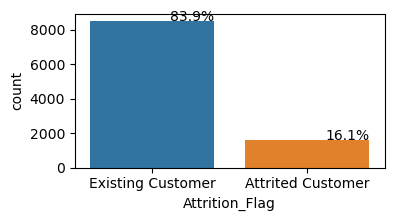

In [17]:
plt.figure(figsize=(4,2))
ax = sns.countplot(x=df['Attrition_Flag'])
total = len(df['Attrition_Flag'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right')
plt.show()

### <span style="color:BLUE"> Target label is imbalanced. Need to consider balancing the data using either class weight or SMOTE </span>


## <span style="color:blue">Numerical Data - Matplotlib plots

In [18]:
# 14 numerical columns
num_col = df.select_dtypes(['int64','float64']).columns.to_list()
#num_col.remove('CLIENTNUM')
num_col

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [19]:
df[num_col].describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

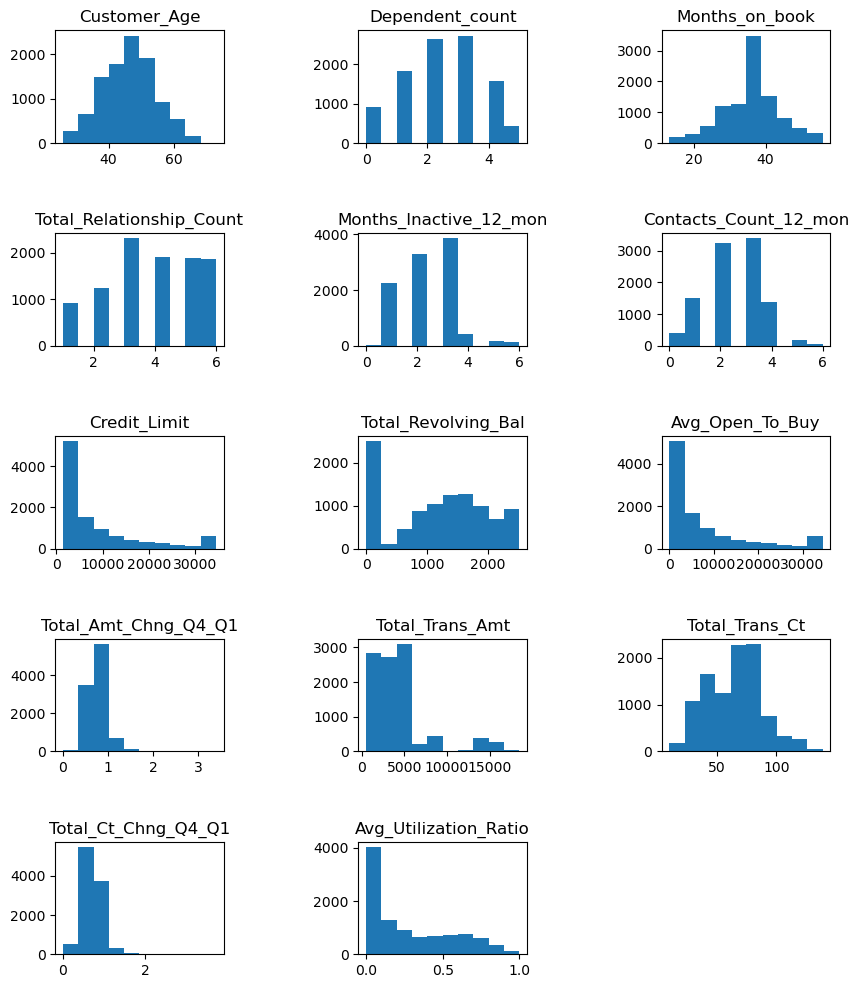

In [20]:
# check data distribution
fig = plt.figure(figsize=(10, 12))
fig.subplots_adjust(hspace=0.8, wspace=0.8)
for i,var in enumerate(num_col):
    ax = fig.add_subplot(5, 3, i+1)
    ax.hist(df[var])
    ax.set_title(var)

df.skew(): If skewness is positive, the data are positively skewed or skewed right, meaning that the right tail of the distribution is longer than the left. If skewness is negative, the data are negatively skewed or skewed left, meaning that the left tail is longer.

In [21]:
df[num_col].skew()

Customer_Age               -0.033605
Dependent_count            -0.020826
Months_on_book             -0.106565
Total_Relationship_Count   -0.162452
Months_Inactive_12_mon      0.633061
Contacts_Count_12_mon       0.011006
Credit_Limit                1.666726
Total_Revolving_Bal        -0.148837
Avg_Open_To_Buy             1.661697
Total_Amt_Chng_Q4_Q1        1.732063
Total_Trans_Amt             2.041003
Total_Trans_Ct              0.153673
Total_Ct_Chng_Q4_Q1         2.064031
Avg_Utilization_Ratio       0.718008
dtype: float64

### <span style="color:blue"> Data is not normal distributed in most columns  </span>

## <span style="color:blue">Categorical Data - Matplotlib plots 

In [22]:
cat_col = df.select_dtypes(['object']).columns.to_list()
#cat_col.remove('Attrition_Flag')
cat_col

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [23]:
df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

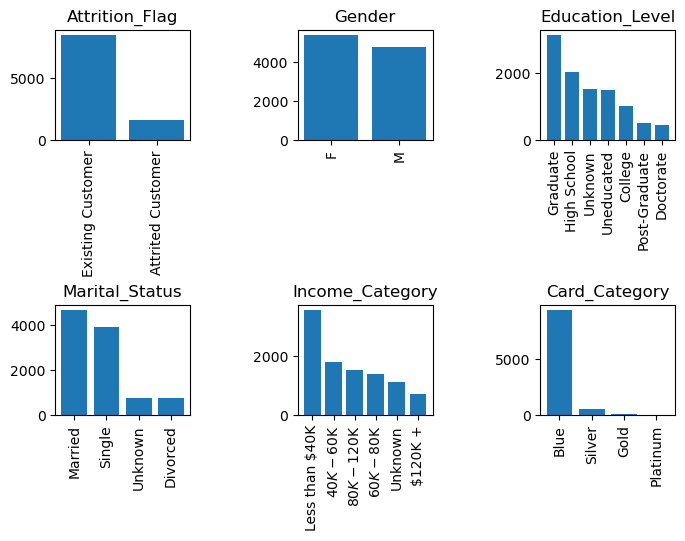

In [24]:
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=1.5, wspace=0.8)
for i,var in enumerate(cat_col):
    tmp = df[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 3, i+1)
    ax.bar(tmp['index'], tmp[var])
    ax.set_title(var)
    ax.tick_params(axis='x', labelrotation = 90)

### <span style="color:blue"> Categorical columns: </span>
- <span style="color:blue"> Card_category is not useful
- <span style="color:blue"> Big mount of Unknown customers in Educational_Level, Marital_status, and Income_Category

In [27]:
def countplot_churn(cat, data):
    fig, axes = plt.subplots(2, 3, figsize=(22, 16))
    fig.subplots_adjust(hspace=0.5, wspace=0.8)
    axes = axes.flatten()
    fig.suptitle('Categorical Features Distributions by Churn',fontsize=30)
    for ax, cat in zip(axes, cat):
        sns.countplot(x=cat,data=data,hue='Attrition_Flag',palette='viridis',ax=ax)
        ax.legend(title='Churn',loc='upper right',labels=['No', 'Yes'], fontsize=20)     
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize=12)
        plt.ylabel('Count', fontsize=20, weight='bold')

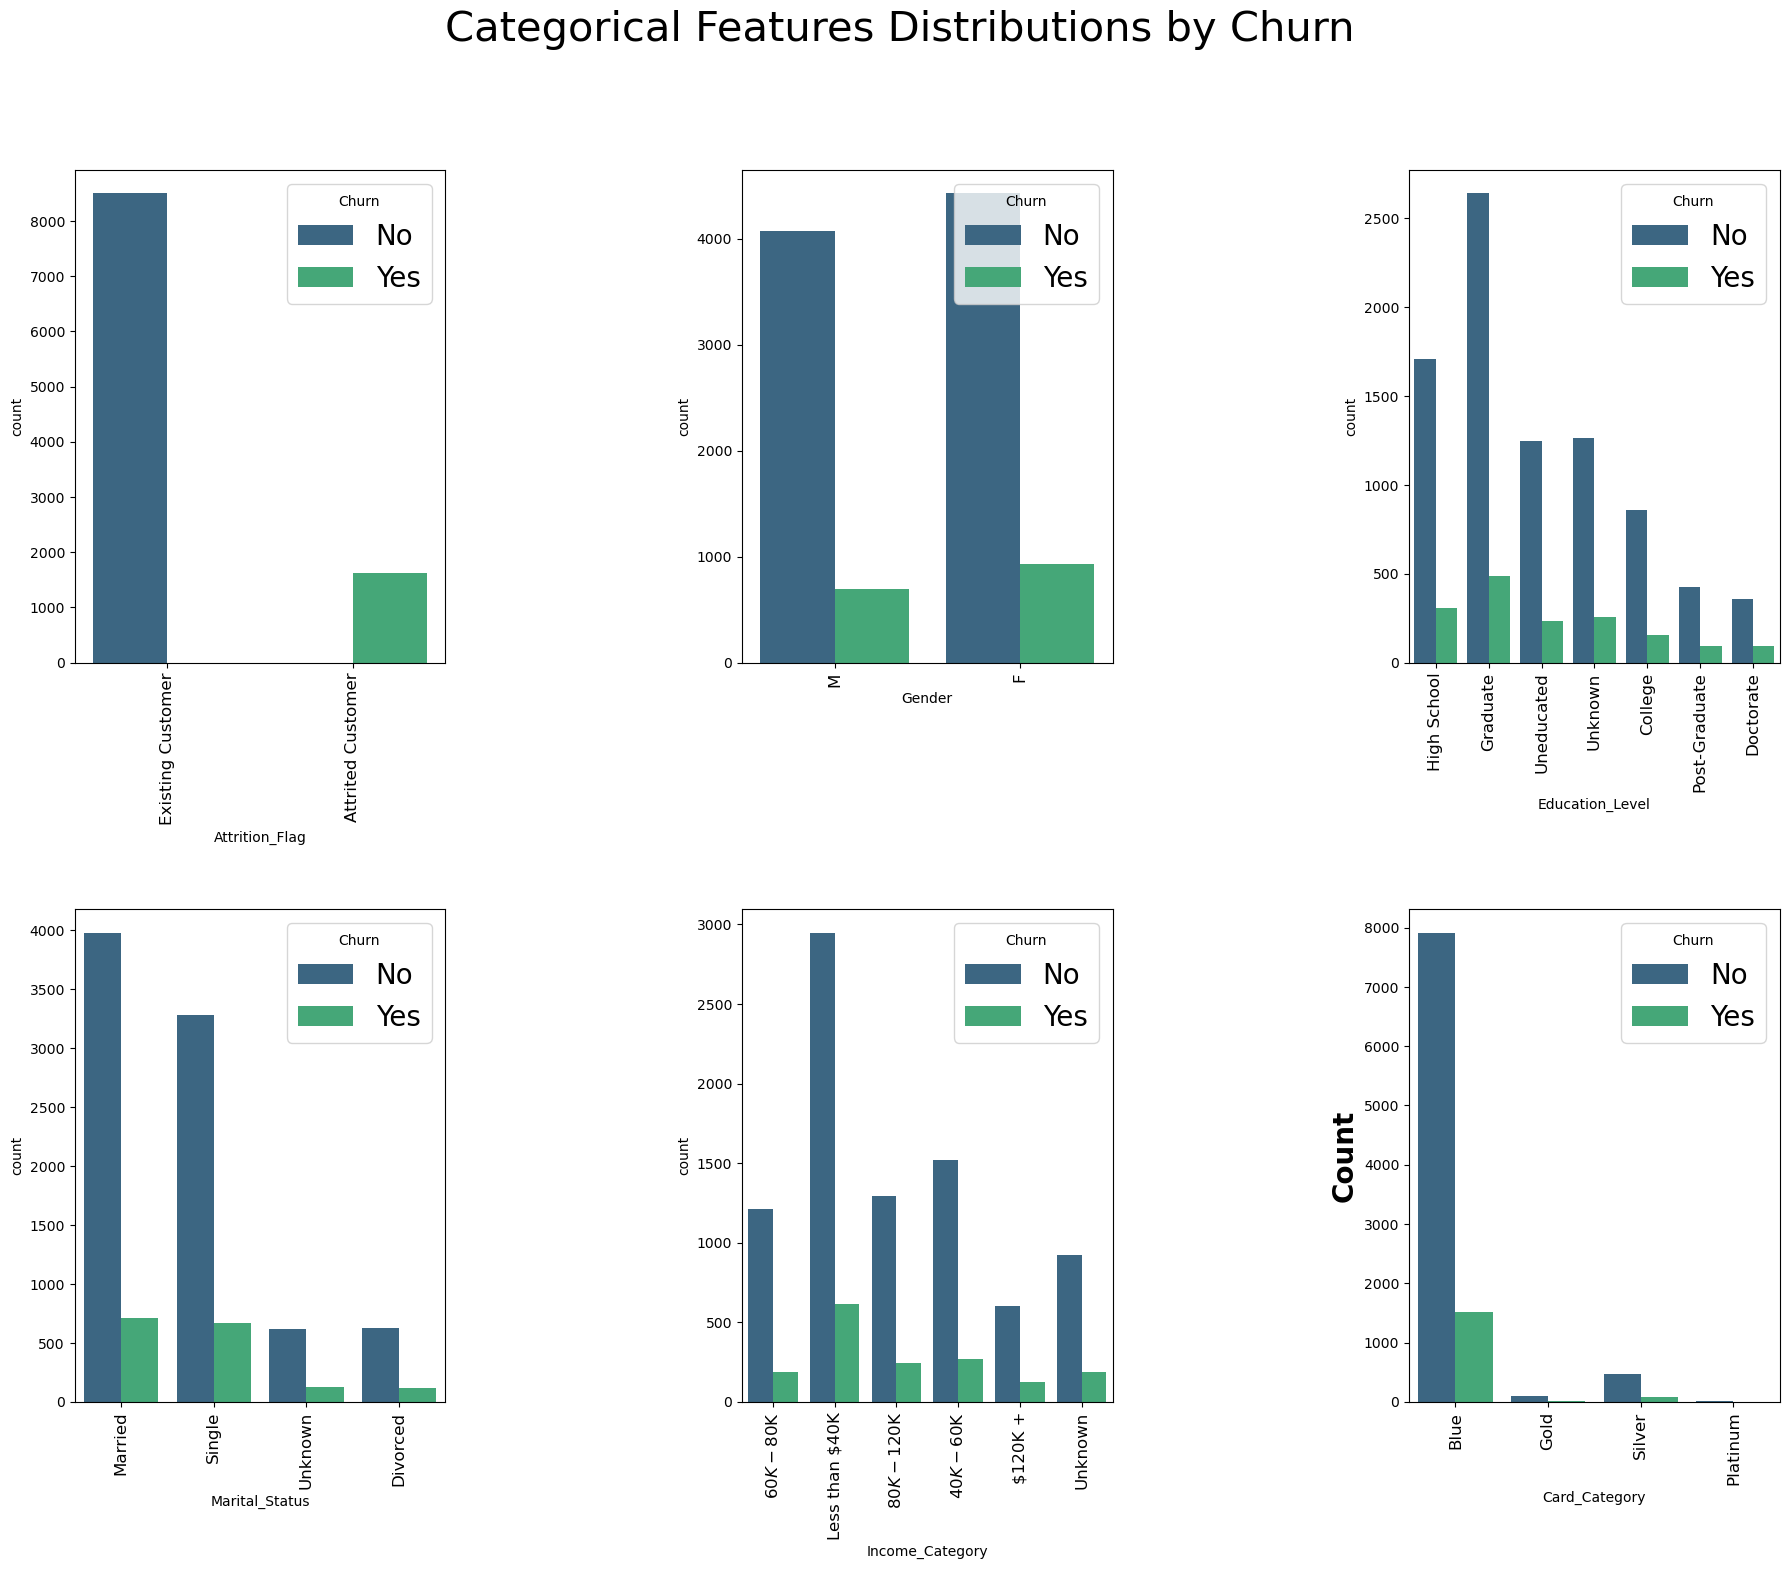

In [28]:
countplot_churn(cat_col, df)

### <span style="color:BLUE"> Summary: all categorical features NOT likely contribute significantly to churn:</span>

- <span style="color:BLUE"> Churn rate is slightly higher in female customers
- <span style="color:BLUE"> Churn rate is slightly higher for customers with doctorate education. Doctorate category contains the least number of customers.
- <span style="color:BLUE"> Churn rate is very higher for customers with Platinum Card. But there are only a few customers with Platinum Card   

### Categorical column: Churn Status/Attrition_Flag 
- imbalanced dataset

In [29]:
fig = make_subplots(rows=1, cols=2)
fig = px.pie(df,names='Attrition_Flag',title='Percentage of Existing and Attrited Customers',
             width=450, height=250, hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig.show()
print('Total number of customers:',df['Attrition_Flag'].count())
print(df['Attrition_Flag'].value_counts())

Total number of customers: 10127
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


### Categorical column: Gender 

In [30]:
fig = px.pie(df,names='Gender',title='Propotion Of Different Marriage Statuses',
             width=450, height=250, hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightBlue",
)
fig.show()

# <span style="color:blue"> Multivariate analysis
### <span style="color:blue"> Purpose is to correlation between features to find out if we have collinearity or multicollinearity between features. Collinearity is detrimental for all machine learning models including linear model, tree-based calssifiers and even KMeans clustering.

## <span style="color:blue"> Pearson correlation between numerical features

Text(0.5, 1.0, 'Pearson correlation bewteen numerical features')

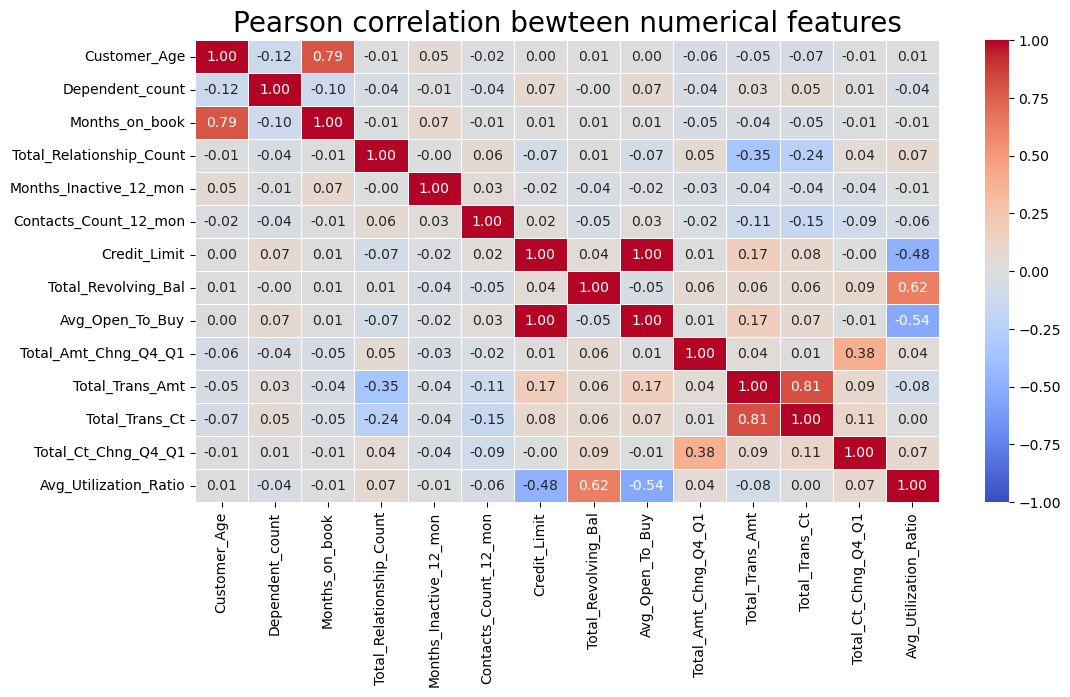

In [31]:
## Relationship between 2 numeric variables
plt.figure(figsize=(12,6))
sns.heatmap(df[num_col].corr(), 
            vmin=-1.0, 
            vmax=1.0, 
            linewidths=0.5, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f')
plt.title('Pearson correlation bewteen numerical features', fontsize=20)

### <span style="color:red"> Insights from above numerical features analysis:
- Total_Revolving_Bal = Credit_Limit - Avg_Open_To_Buy
- Avg_Utilization_Ratio = Total_Revolving_Bal  / credit limit
- Usually Total_Revolving_Bal is much smaller than Avg_Open_To_Buy. Thus Credit_Limit is close to Avg_Open_To_Buy in most columns. Correlation is 1.0 between them. We can drop Avg_Open_To_Buy column
- Customer_age correlates well with Months_On_Book (0.79)
- Total_Trans_Ct also well correlates with Total_Trans_Amt (0.81). This is also understandable. 
- Also correlates well are Total_Revolving_Bal and Ave_Utlization_Ratio

### <span style="color:red">Possible feature engineering with numerical features:</span>
- <span style="color:red">We can drop Avg_Open_To_Buy.
- <span style="color:red">We can consider either drop one of these two olumns: Total_Trans_Amt Total_Trans_Ct or, we can generate a new column Ave_Purchase_Price = Total_Trans_Amt / Total_Trans_Ct, since Total_Trans_Ct correlates well with Total_Trans_Amt (0.81). Not sure which way is better.
- <span style="color:red"> Customer_age correlates well with Months_On_Book (0.79). Maybe we can also drop one of them. For example, drop Customer_age  
- <span style="color:red">Can we drop Avg_Utilization_Ratio? Since Avg_Utilization_Ratio = Total_Revolving_Bal / credit limit
- <span style="color:red">We will also perform phiK analysis on all columns and get an estimate how numerical features correlate with label (churn). 

## <span style="color:blue"> phiK analysis between all columns (num + cat + churn)

### https://pypi.org/project/phik/
Phi_K is a practical correlation constant that works consistently between categorical, ordinal and interval variables. It is based on several refinements to Pearson’s hypothesis test of independence of two variables. Essentially, the contingency test statistic of two variables is interpreted as coming from a rotated bi-variate normal distribution, where the tilt is interpreted as Phi_K.

In [33]:
!PIP install phik
# for phiK correlation analysis
from scipy import stats
import phik
from phik import resources, report

     -------------------------------------- 663.5/663.5 kB 2.6 MB/s eta 0:00:00


In [34]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


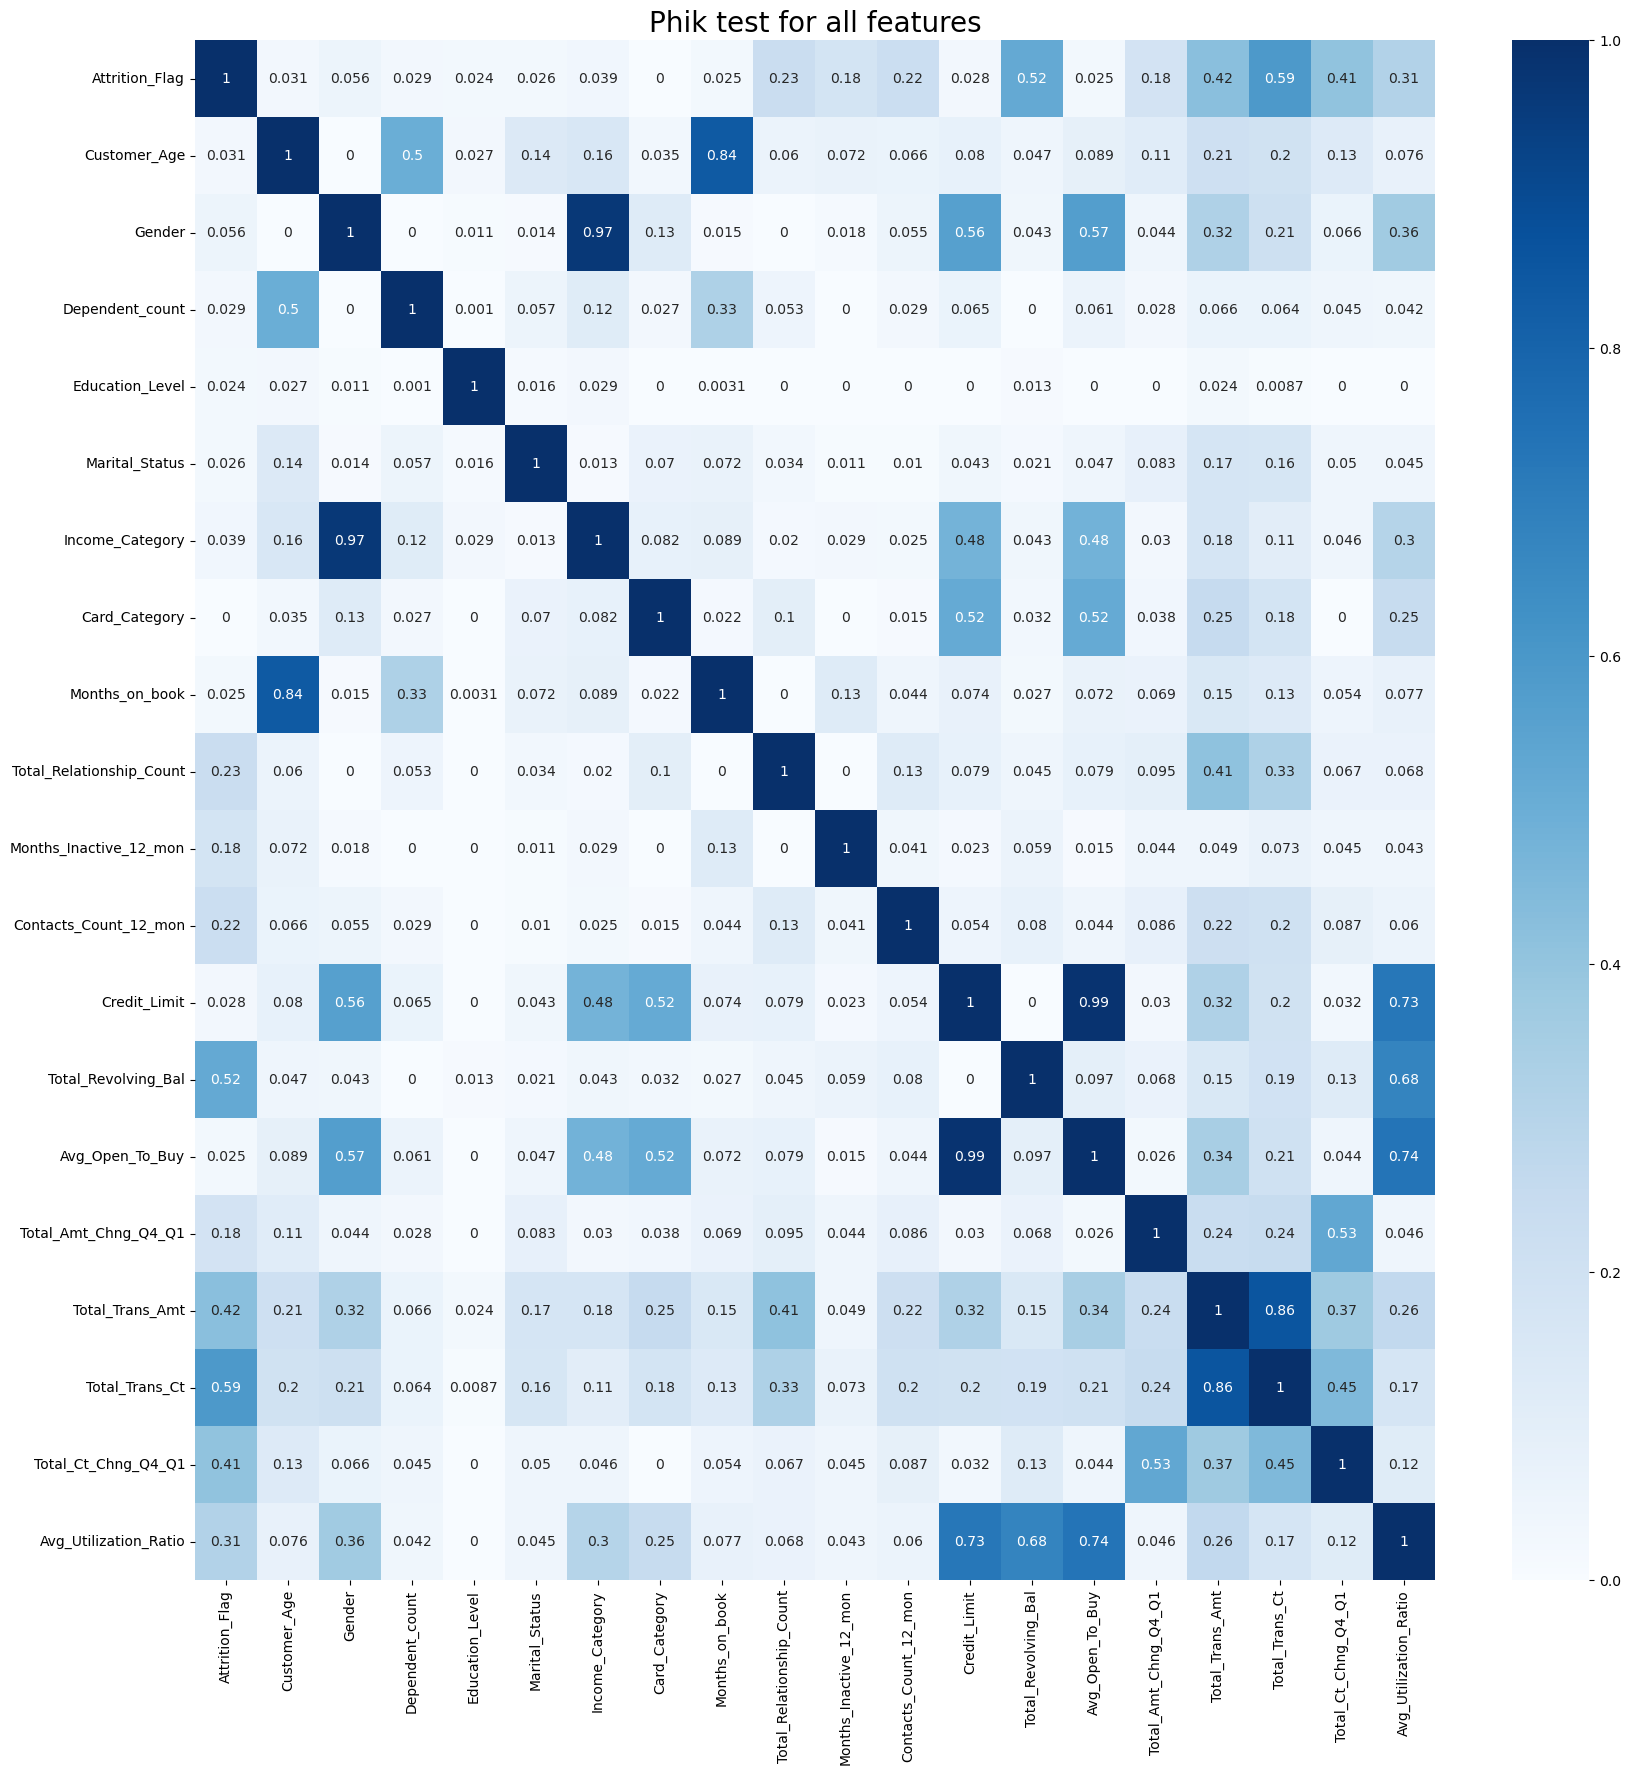

In [35]:
result = df.phik_matrix()

fig = plt.figure(figsize=(20,20))
sns.heatmap(result, annot=True, cmap='Blues')
plt.title('Phik test for all features', fontsize = 20)
plt.show()

interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


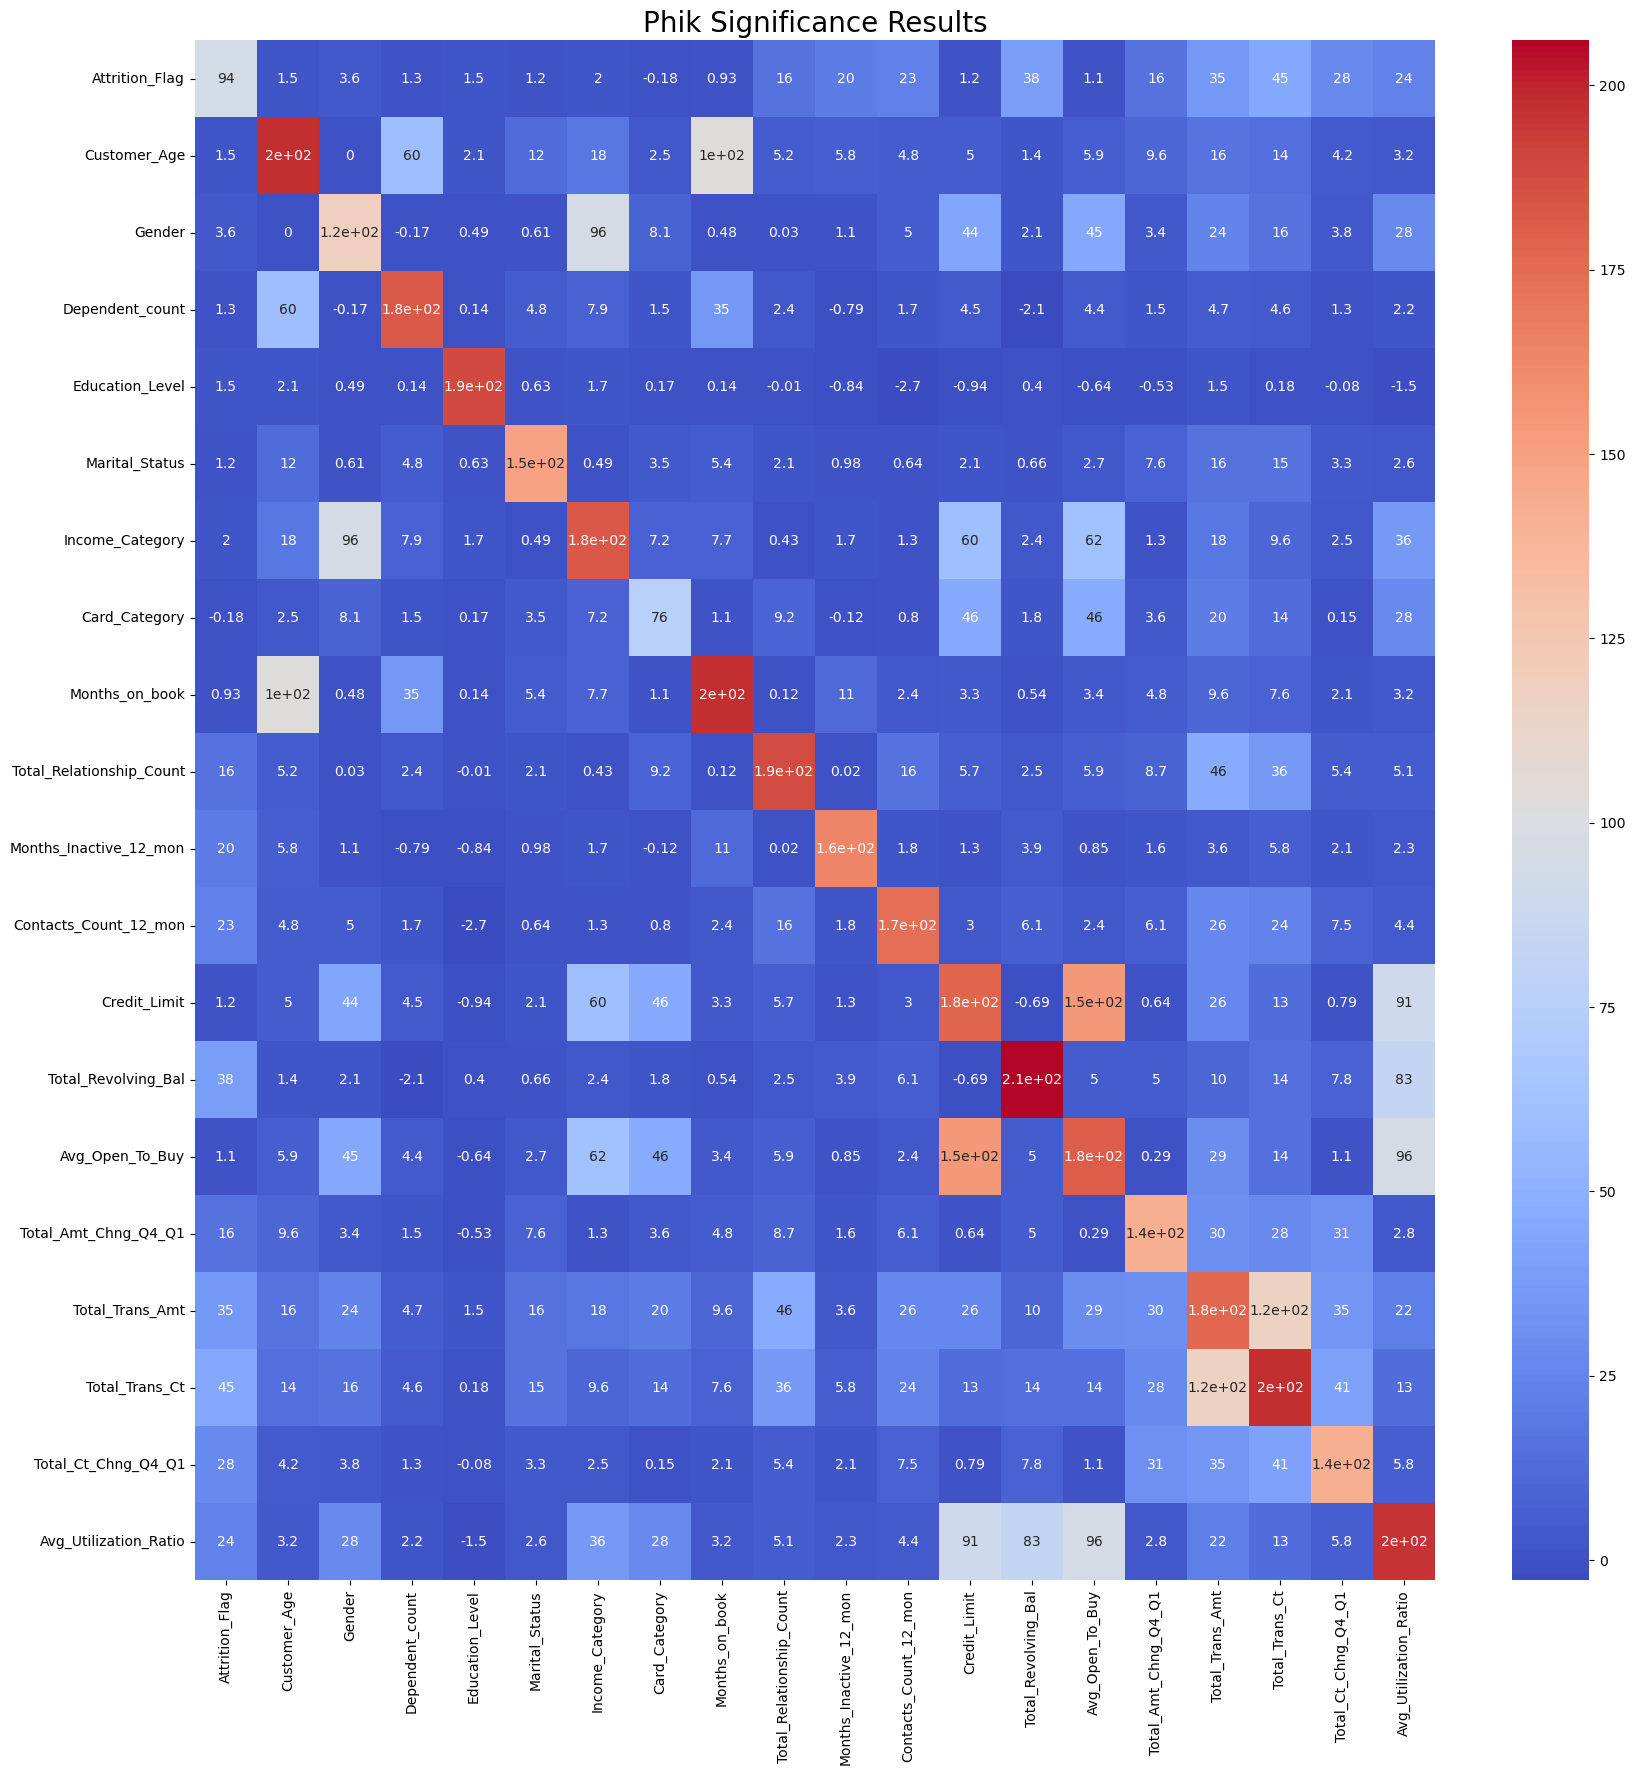

In [43]:
sig = df.significance_matrix()
fig = plt.figure(figsize=(20,20))
sns.heatmap(round(sig,2), annot=True, cmap='coolwarm')
plt.title('Phik Significance Results', fontsize = 20)
plt.show()

1. The high correlations of numeric features observed with Pearson's r are also shown in phiK analysis. 
2. 'Income_Category' and 'Gender' are highly correlated (phik 0.97). we can consider to drop one.

# <span style="color:BLUE">2.Data Precessing and feature engineering

In [40]:
df = pd.read_csv('../Downloads/BankChurners.csv')

In [42]:
df = df.drop(columns = [ 'CLIENTNUM',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [44]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

## We want to apply feature seletion to eliminate collinear and nonimportant features from modeling.
- Reduce feature dimensions
- Reduce overfitting

## First, I will use filter method to eliminate highly correlated features (phiK socre <0.8). Later I will use wrapper method Recursive Feature Elimination (RFE) to select important features used for modeling

interval columns not set, guessing: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


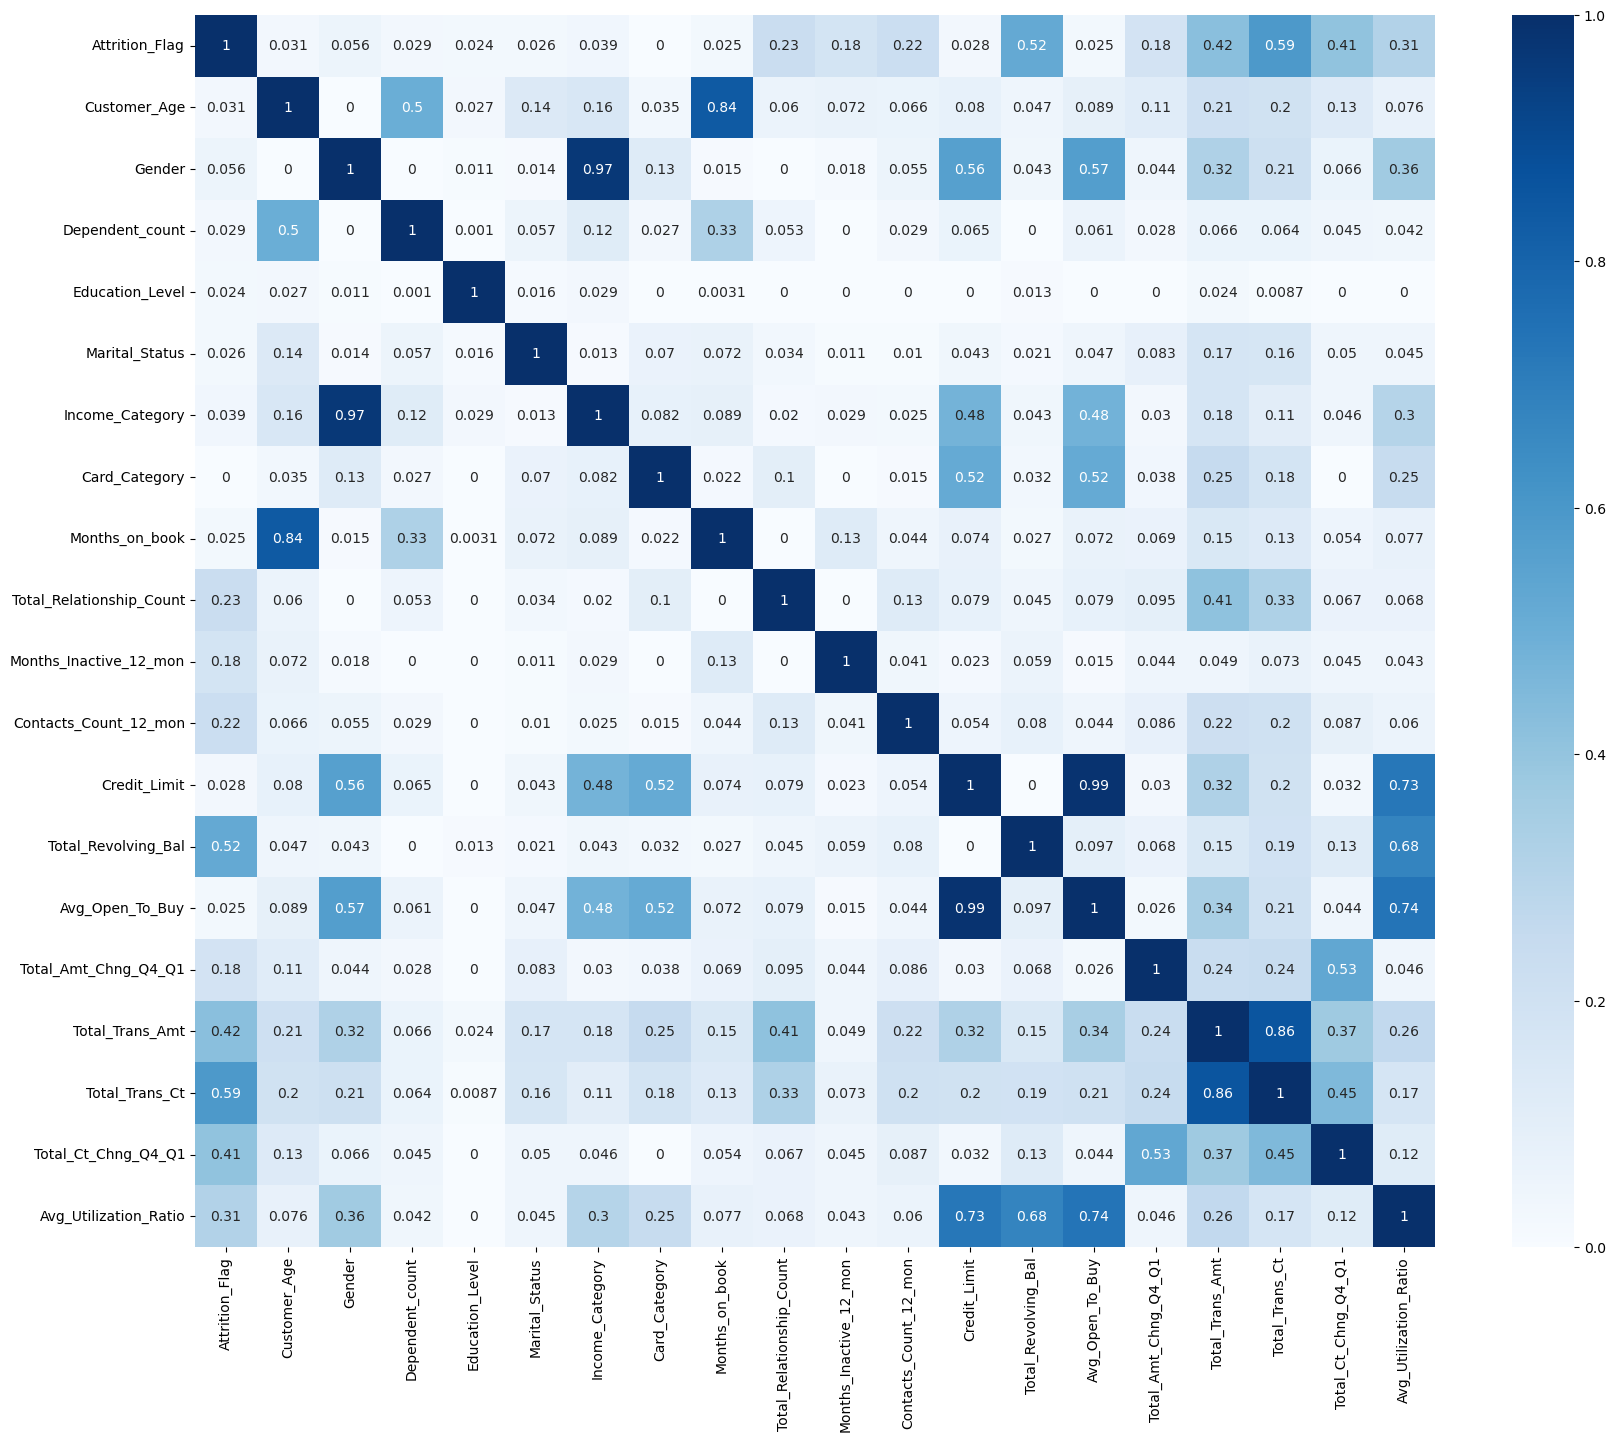

In [45]:
fig = plt.figure(figsize=(20,16))
sns.heatmap(df.phik_matrix(), annot=True, cmap='Blues')
plt.show()

## From EDA study on numerical and categorical columns, we observe some strong correlations between features. We are going to perform the following feture engineering based on phiK socres (use 0.8 as cutoff):
1. Drop column Avg_Open_To_Buy since it correlates strongly with column Credit_Limit (phiK score 0.99);
2. Drop column Total_Trans_Amt since it correlates well with column Total_Trans_Ct (phiK score 0.86) and column Total_Trans_Ct correlates better with label Attrition_Flag;
3. Drop column Income_Category since it correlates strongly with column Gender (phiK score 0.97) and column Gender correlates better with label Attrition_Flag;
4. Drop column Months_on_book since it correlates strongly with column Customer_Age (phiK score 0.84) and column Customer_Age correlates better with label Attrition_Flag;

In [46]:
collinear_col = ['Avg_Open_To_Buy', 'Total_Trans_Amt', 'Income_Category', 'Months_on_book']
df = df.drop(columns = collinear_col, axis=1) 

In [47]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio'],
      dtype='object')

## From EDA, we know there is no missing values in the dataset. Howeever there are "Unknown" category in columns Education_Level and Marital_Status

In [48]:
print("Unique values in each categorical column:", '\n')
for col in df.select_dtypes(include=[object]):
    if(col != 'Attrition_Flag'):
         print(col,":", df[col].unique())

Unique values in each categorical column: 

Gender : ['M' 'F']
Education_Level : ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Card_Category : ['Blue' 'Gold' 'Silver' 'Platinum']


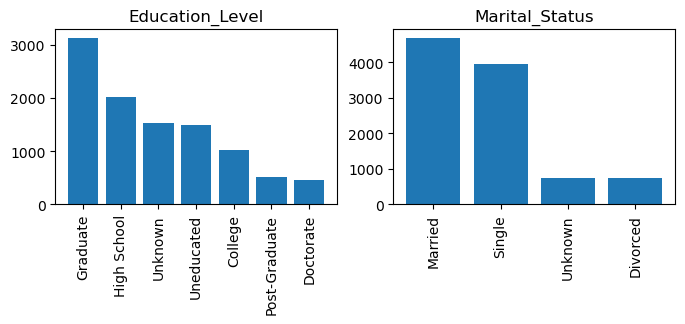

In [49]:
fig = plt.figure(figsize=(8, 5))
#fig.subplots_adjust(hspace=1.5, wspace=0.8)
for i,var in enumerate(['Education_Level', 'Marital_Status']):
    tmp = df[var].value_counts().reset_index()
    ax = fig.add_subplot(2, 2, i+1)
    ax.bar(tmp['index'], tmp[var])
    ax.set_title(var)
    ax.tick_params(axis='x', labelrotation = 90)

## Preprocessing categorical columns:
1. We will use OneHot encoding for column Gender and Marital_Status since there is no obvious order between different groups in the column. We will leave unknown as a new group in column Marital_Status since we don't have a good way to guess its value.
2. We will use ordinal encoding for columns Education_Level and Card_Category since there is obvious order between different groups in each column. Unknown value in column Education_Level will also be treated as a seperate group since there is no dominant group in the column. It is probably not fair to fill it with mode. We can try it out.

In [50]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, column, ordering):
    df = df.copy()
    df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, column, prefix):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [51]:
# Encode ordinal column Educational_Level
education_ordering = [
        'Unknown',
        'Uneducated',
        'High School',
        'College',
        'Graduate',
        'Post-Graduate',
        'Doctorate'
]

In [52]:
# Encode ordinal column Card_Category
card_ordering = [
        'Blue',
        'Silver',
        'Gold',
        'Platinum',
]

In [53]:
# Binary encoding columns: Attrition_Flag and Gender
df = binary_encode(df, 'Attrition_Flag', positive_value='Attrited Customer')
df = binary_encode(df, 'Gender', positive_value='M')

In [54]:
# Ordinal encoding columns: Educational_Level and Card_Category
df = ordinal_encode(df, 'Education_Level', ordering=education_ordering)
df = ordinal_encode(df, 'Card_Category', ordering=card_ordering)

In [55]:
# OneHot encode column Marital_Status
df = onehot_encode(df, 'Marital_Status', prefix='MS')

In [56]:
df.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               0            45       1                3                2   
1               0            49       0                5                4   
2               0            51       1                3                4   
3               0            40       0                4                2   
4               0            40       1                3                1   

   Card_Category  Total_Relationship_Count  Months_Inactive_12_mon  \
0              0                         5                       1   
1              0                         6                       1   
2              0                         4                       1   
3              0                         3                       4   
4              0                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                      3       12691.0                  777   
1                      2        8256.0                  864   
2                      0        3418.0                    0   
3                      1        3313.0                 2517   
4                      0        4716.0                    0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335              42                1.625   
1                 1.541              33                3.714   
2                 2.594              20                2.333   
3                 1.405              20                2.333   
4                 2.175              28                2.500   

   Avg_Utilization_Ratio  MS_Divorced  MS_Married  MS_Single  MS_Unknown  
0                  0.061            0           1          0           0  
1                  0.105            0           0          1           0  
2                  0.000            0           1          0           0  
3                  0.760            0           0          0           1  
4                  0.000            0           1          0           0

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
# from imblearn.pipeline import make_pipeline

In [64]:
y = df['Attrition_Flag']
X = df.drop('Attrition_Flag', axis=1)

In [65]:
sd = StandardScaler()
X = pd.DataFrame(sd.fit_transform(X), columns=X.columns)

In [66]:
X.head()

Customer_Age    Gender  Dependent_count  Education_Level  Card_Category  \
0     -0.165406  1.059956         0.503368        -0.354022      -0.250587   
1      0.333570 -0.943436         2.043199         0.822218      -0.250587   
2      0.583058  1.059956         0.503368         0.822218      -0.250587   
3     -0.789126 -0.943436         1.273283        -0.354022      -0.250587   
4     -0.789126  1.059956         0.503368        -0.942142      -0.250587   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                  0.763943               -1.327136               0.492404   
1                  1.407306               -1.327136              -0.411616   
2                  0.120579               -1.327136              -2.219655   
3                 -0.522785                1.641478              -1.315636   
4                  0.763943               -1.327136              -2.219655   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \
0      0.446622            -0.473422              2.623494       -0.973895   
1     -0.041367            -0.366667              3.563293       -1.357340   
2     -0.573698            -1.426858              8.367214       -1.911206   
3     -0.585251             1.661686              2.942843       -1.911206   
4     -0.430877            -1.426858              6.455682       -1.570365   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  MS_Divorced  MS_Married  \
0             3.834003              -0.775882    -0.282405    1.077338   
1            12.608573              -0.616276    -0.282405   -0.928214   
2             6.807864              -0.997155    -0.282405    1.077338   
3             6.807864               1.759686    -0.282405   -0.928214   
4             7.509325              -0.997155    -0.282405    1.077338   

   MS_Single  MS_Unknown  
0  -0.798507   -0.282609  
1   1.252337   -0.282609  
2  -0.798507   -0.282609  
3  -0.798507    3.538459  
4  -0.798507   -0.282609

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify = y, random_state=42)

# <span style="color:blue">SMOTE method for imbalanced data

In [76]:
y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [74]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [75]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [77]:
bsm = BorderlineSMOTE(k_neighbors=5, m_neighbors=10, random_state=42)
X_train_bsm, y_train_bsm = bsm.fit_resample(X_train, y_train)
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [78]:
#Check the result of SMOTE
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))
print(Counter(y_train_bsm))

Counter({0: 6799, 1: 1302})
Counter({0: 6799, 1: 6799})
Counter({0: 6799, 1: 6799})


Next, we do feature selection again to enable the machine learning algorithm to train faster, reduce model complexity, increase interpretability, and improve model accuracy if the right features subset is chosen.

Recursive Feature Elimination with Cross-Validation (RFECV) is a method for selecting a subset of features for a machine learning model by recursively eliminating features and evaluating the performance of the model on a cross-validated dataset.


In [79]:
from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [80]:
import time
start = time.time()

lg = LogisticRegression()
rfecv = RFECV(estimator=lg, cv=10, scoring='recall')
rfecv.fit(X_train_sm, y_train_sm)

end = time.time() 
print(f'This grid search session took {(end - start) / 60} minutes.')

This grid search session took 0.16916933059692382 minutes.


In [84]:
print("Feature ranking: ", rfecv.ranking_)

Feature ranking:  [1 1 1 6 1 1 1 1 3 1 5 1 1 1 4 2 1 1]


In [85]:
mask = rfecv.get_support()
features = X_train_sm.columns
best_features = features[mask]
 
print("All features: ", X_train_sm.shape[1])
print(features)

print("Selected best: ", best_features.shape[0])
print(features[mask]) 

All features:  18
Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'MS_Divorced', 'MS_Married', 'MS_Single',
       'MS_Unknown'],
      dtype='object')
Selected best:  13
Index(['Customer_Age', 'Gender', 'Dependent_count', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'MS_Single',
       'MS_Unknown'],
      dtype='object')


In [86]:
#Saving dataframe with optimal features
X_train_sm_rfe = X_train_sm.iloc[:, rfecv.support_]
X_test_rfe = X_test.iloc[:, rfecv.support_]

#Overview of the optimal features in comparison with the intial dataframe
print("X_train_sm dimension: {}".format(X_train_sm.shape))
print("X_train_sm column list:", X_train_sm.columns.tolist())
print()
print("X_train_sm_rfe dimension: {}".format(X_train_sm_rfe.shape))
print("X_train_sm_rfe column list:", X_train_sm_rfe.columns.tolist())

X_train_sm dimension: (13598, 18)
X_train_sm column list: ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'MS_Divorced', 'MS_Married', 'MS_Single', 'MS_Unknown']

X_train_sm_rfe dimension: (13598, 13)
X_train_sm_rfe column list: ['Customer_Age', 'Gender', 'Dependent_count', 'Card_Category', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'MS_Single', 'MS_Unknown']


In [87]:
X_train_sm_rfe.columns, X_test_rfe.columns

(Index(['Customer_Age', 'Gender', 'Dependent_count', 'Card_Category',
        'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'MS_Single',
        'MS_Unknown'],
       dtype='object'),
 Index(['Customer_Age', 'Gender', 'Dependent_count', 'Card_Category',
        'Total_Relationship_Count', 'Months_Inactive_12_mon',
        'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct',
        'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'MS_Single',
        'MS_Unknown'],
       dtype='object'))

# <span style="color:magenta">3 Model Selection

In [91]:
# Models
!pip install lightgbm
!pip install catboost
from sklearn.model_selection import KFold,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier

     ---------------------------------------- 74.0/74.0 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00


In [98]:
# Models
from sklearn.model_selection import KFold,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)

In [99]:
def report_loss_cf(name, model, X_train, y_train, X_test, y_test, graph=0):
    
    print('Model performance for: ', name)
    
    def calculate_loss(model, X, y):
        pred = model.predict(X)
        pred_proba = model.predict_proba(X)

        accuracy = accuracy_score(y, pred)
        precision = precision_score(y, pred)
        recall = recall_score(y, pred)
        f1 = f1_score(y, pred)
        auc = roc_auc_score(y, pred_proba[:,1])
        fpr, tpr, _ = roc_curve(y, pred_proba[:,1])
        return pred, accuracy, precision, recall, f1, auc, fpr, tpr
    
    y_train_pred, accuracy_train, precision_train, recall_train, f1_train, auc_train, fpr_train, tpr_train = calculate_loss(
        model, X_train, y_train)
    print(f'train set accuracy: {accuracy_train:.3f}')
    print(f'train set precision: {precision_train:.3f}')
    print(f'train set recall: {recall_train:.3f}')
    print(f'train set f1 score: {f1_train:.3f}')
    print(f'training set AUC score: {auc_train:.3f}')
    print()
    
    y_test_pred, accuracy_test, precision_test, recall_test, f1_test, auc_test, fpr_test, tpr_test = calculate_loss(
        model, X_test, y_test)
    print(f'test set accuracy: {accuracy_test:.3f}')
    print(f'test set precision: {precision_test:.3f}')
    print(f'test set recall: {recall_test:.3f}')
    print(f'test set f1 score: {f1_test:.3f}')
    print(f'test set AUC score: {auc_test:.3f}')

    if graph == 0:
        return 

    elif graph == 1:
        
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7, 3))
        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)
        
        sns.heatmap(cm_train, annot=True, cmap="Blues", fmt='g', ax=ax1)
        ax1.set_title('train set')
        ax1.set_xlabel('Predicted labl')
        ax1.set_ylabel('True label')
        ax1.xaxis.set_ticklabels(['Customer', 'Churner'])
        ax1.yaxis.set_ticklabels(['Customer', 'Churner'])
        
        sns.heatmap(cm_test, annot=True, cmap="Blues", fmt='g', ax=ax2)
        ax2.set_title('test set')
        ax2.set_xlabel('Predicted labl')
        ax2.set_ylabel('True label')
        ax2.xaxis.set_ticklabels(['Customer', 'Churner'])
        ax2.yaxis.set_ticklabels(['Customer', 'Churner'])
        plt.tight_layout()
        plt.show()
        
    elif graph == 2:   
        
        plt.figure(figsize=(5,3))
        plt.plot([0,1], [0,1], linestyle='--', label='random')
        plt.plot(fpr_train, tpr_train,label="Train_AUC="+str(auc_train.round(3)))
        plt.plot(fpr_test,tpr_test,label="Test_AUC="+str(auc_test.round(3)))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc=4)
        plt.tight_layout()
        plt.show()

In [93]:
!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_sm_rfe, X_test_rfe, y_train_sm, y_test)

print(models)

100%|██████████| 29/29 [05:09<00:00, 10.68s/it]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.89               0.85     0.85      0.89   
XGBClassifier                      0.93               0.85     0.85      0.93   
RandomForestClassifier             0.92               0.84     0.84      0.92   
AdaBoostClassifier                 0.90               0.84     0.84      0.90   
LGBMClassifier                     0.93               0.84     0.84      0.92   
KNeighborsClassifier               0.85               0.83     0.83      0.86   
BaggingClassifier                  0.91               0.82     0.82      0.91   
ExtraTreesClassifier               0.92               0.82     0.82      0.92   
NuSVC                              0.87               0.82     0.82      0.88   
RidgeClassifierCV                  0.83               0.81     0.81      0.85   
RidgeClassifier             

Based on baseline performance, we will use XGBClassifier as model

In [95]:
#Metrics
from sklearn import metrics
from sklearn.metrics import (
    auc,
    roc_curve,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    plot_confusion_matrix,
)

Model performance for:  LightGBMClassifier
train set accuracy: 0.989
train set precision: 0.992
train set recall: 0.987
train set f1 score: 0.989
training set AUC score: 0.999

test set accuracy: 0.930
test set precision: 0.814
test set recall: 0.729
test set f1 score: 0.769
test set AUC score: 0.962


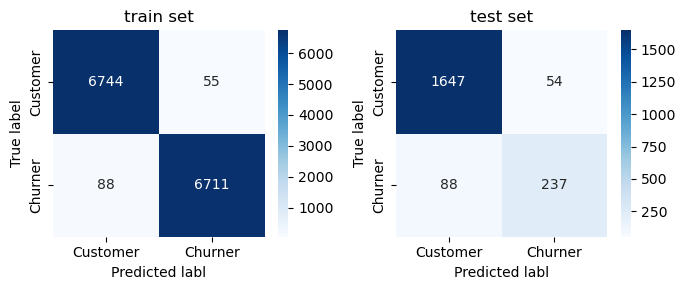

In [96]:
light=LGBMClassifier(objective='binary')
model_light = light.fit(X_train_sm, y_train_sm)
report_loss_cf('LightGBMClassifier', model_light, X_train_sm, y_train_sm, X_test, y_test, graph=1)

Model performance for:  XGBClassifier
train set accuracy: 0.993
train set precision: 0.995
train set recall: 0.991
train set f1 score: 0.993
training set AUC score: 1.000

test set accuracy: 0.928
test set precision: 0.805
test set recall: 0.726
test set f1 score: 0.764
test set AUC score: 0.948


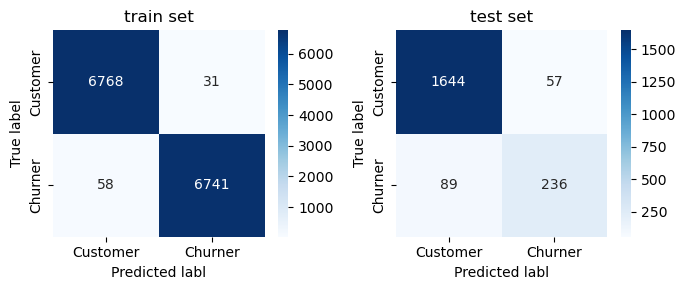

In [101]:
xgbc=XGBClassifier(random_state=2022)
model = xgbc.fit(X_train_sm_rfe, y_train_sm)
report_loss_cf('XGBClassifier', model, X_train_sm_rfe, y_train_sm, X_test_rfe, y_test, graph=1)

In [102]:
# for parameter tuning, let try randomsearchCV first, then use GridsearchCV to fine tune
# there are 7 (or 9 if use Lasso, ridge) parameters to tune a XGBoost model
# learning rate: [0.01, 0.05, 0.1]
# n_estimators: number of decision trees. Let try range(50,501,50)
# max_depth: 这个参数的取值最好在2-12之间. try range(4,12,2)
# min_child_weight: 和GBM的 min_sample_leaf 参数类似. For preventing overfitting. 
# gamma: 这个参数的值越大，算法越保守. try [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
# subsample: 减小这个参数的值，算法会更加保守，避免过拟合。但是，如果这个值设置得过小，它可能会导致欠拟合。
#               subsample, colsample_bytree = 0.8, 这个是最常见的初始值了。典型值的范围在0.5-1.0之间
# colsample_bytree: 和GBM里面的max_features参数类似。用来控制每棵随机采样的列数的占比(每一列是一个特征)。
#                   典型值：0.5-1
# reg_alpha: 权重的L1正则化项。(和Lasso regression类似). 可以应用在很高维度的情况下，使得算法的速度更快。
#             [0, 0.001, 0.005, 0.01, 0.05] or 0.0–1.0
# reg_lambda: 权重的L2正则化项。(和Ridge regression类似)。这个参数是用来控制XGBoost的正则化部分的。
#               虽然大部分数据科学家很少用到这个参数，但是这个参数在减少过拟合上还是可以挖掘出更多用处的。
#               0.0–1.0
import time
start = time.time()

param_xgbrs = {'learning_rate':[0.05, 0.1],
               'n_estimators':range(50,201,50),
               'max_depth':range(4,10,2), 
               'min_child_weight':range(6,15,4), 
               'gamma':[0.0, 0.25, 0.5],
               'subsample': [0.6, 0.8, 1.0],
               'colsample_bytree': [0.6, 0.8, 1.0],
               'reg_alpha':[1e-2, 0.1, 1, 100],
               'reg_lambda':[1e-2, 0.1, 1, 100],
              }

xgb_random = RandomizedSearchCV(estimator=XGBClassifier(), param_distributions=param_xgbrs, 
                n_iter=600, cv=5, random_state=2022, n_jobs=-1)
xgb_random.fit(X_train_sm, y_train_sm)

print(xgb_random.best_score_) 
print(xgb_random.best_params_)

end = time.time() 
print(f'This grid search session took {(end - start) / 60} minutes.')

0.9497751119572507
{'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 50, 'min_child_weight': 6, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.0, 'colsample_bytree': 0.6}
This grid search session took 82.69434992869695 minutes.


Model performance for:  XGBClassifier-opt
train set accuracy: 0.967
train set precision: 0.969
train set recall: 0.966
train set f1 score: 0.967
training set AUC score: 0.995

test set accuracy: 0.918
test set precision: 0.742
test set recall: 0.745
test set f1 score: 0.743
test set AUC score: 0.948


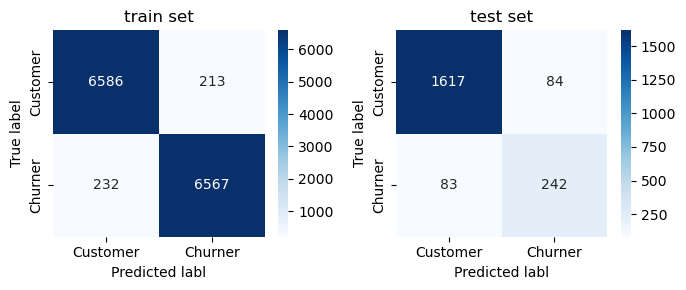

In [105]:
xgbc_opt=XGBClassifier(learning_rate=0.05, n_estimators=50, max_depth=8, min_child_weight=6,
                             gamma=0, subsample=0.8, colsample_bytree=0.6, reg_alpha=0.1, 
                             reg_lambda = 1, random_state=42)
model_opt = xgbc_opt.fit(X_train_sm, y_train_sm)
report_loss_cf('XGBClassifier-opt', model_opt, X_train_sm, y_train_sm, X_test, y_test, graph=1)

In [107]:
start = time.time()
params_xgbc = {'learning_rate':[0.05, 0.1],
               'n_estimators':[50, 75, 100],
               'max_depth':[6,8,10], 
               'min_child_weight':[6,8], 
               'gamma':[0.0, 0.2],
               'subsample': [0.8, 1.0],
               'colsample_bytree': [0.6, 0.8],
               'reg_alpha':[0.1, 1],
               'reg_lambda':[0.001, 0.01],
              }

grid_xgbc = GridSearchCV(XGBClassifier(), params_xgbc, cv=5, scoring = 'recall') 
grid_xgbc.fit(X_train_sm, y_train_sm) 

print(grid_xgbc.best_score_) 
print(grid_xgbc.best_params_)

end = time.time() 
print(f'This grid search session took {(end - start) / 60} minutes.')

0.947056010041986
{'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 50, 'reg_alpha': 0.1, 'reg_lambda': 0.01, 'subsample': 1.0}
This grid search session took 149.71268875996273 minutes.


Model performance for:  XGBClassifier-opt2
train set accuracy: 0.974
train set precision: 0.972
train set recall: 0.977
train set f1 score: 0.974
training set AUC score: 0.997

test set accuracy: 0.919
test set precision: 0.735
test set recall: 0.769
test set f1 score: 0.752
test set AUC score: 0.947


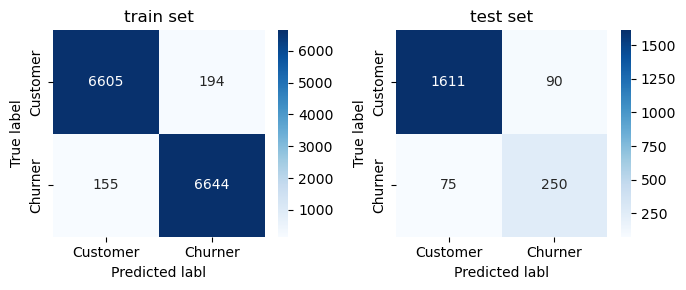

In [109]:
xgbc_opt=XGBClassifier(learning_rate=0.05, n_estimators=50, max_depth=10, min_child_weight=6,
                             gamma=0.2, subsample=1.0, colsample_bytree=0.8, reg_alpha=0.1, 
                             reg_lambda = 0.01, random_state=42)
model_opt = xgbc_opt.fit(X_train_sm, y_train_sm)
report_loss_cf('XGBClassifier-opt2', model_opt, X_train_sm, y_train_sm, X_test, y_test, graph=1)

### plot the feature inportance

In [110]:
feat_importance = model_opt.feature_importances_
df_feat_importance = pd.DataFrame(feat_importance,columns=['Score'],index=X.columns)
df_feat_importance.sort_values(by='Score',ascending=False).style.background_gradient(cmap='OrRd')

<AxesSubplot:xlabel='Score'>

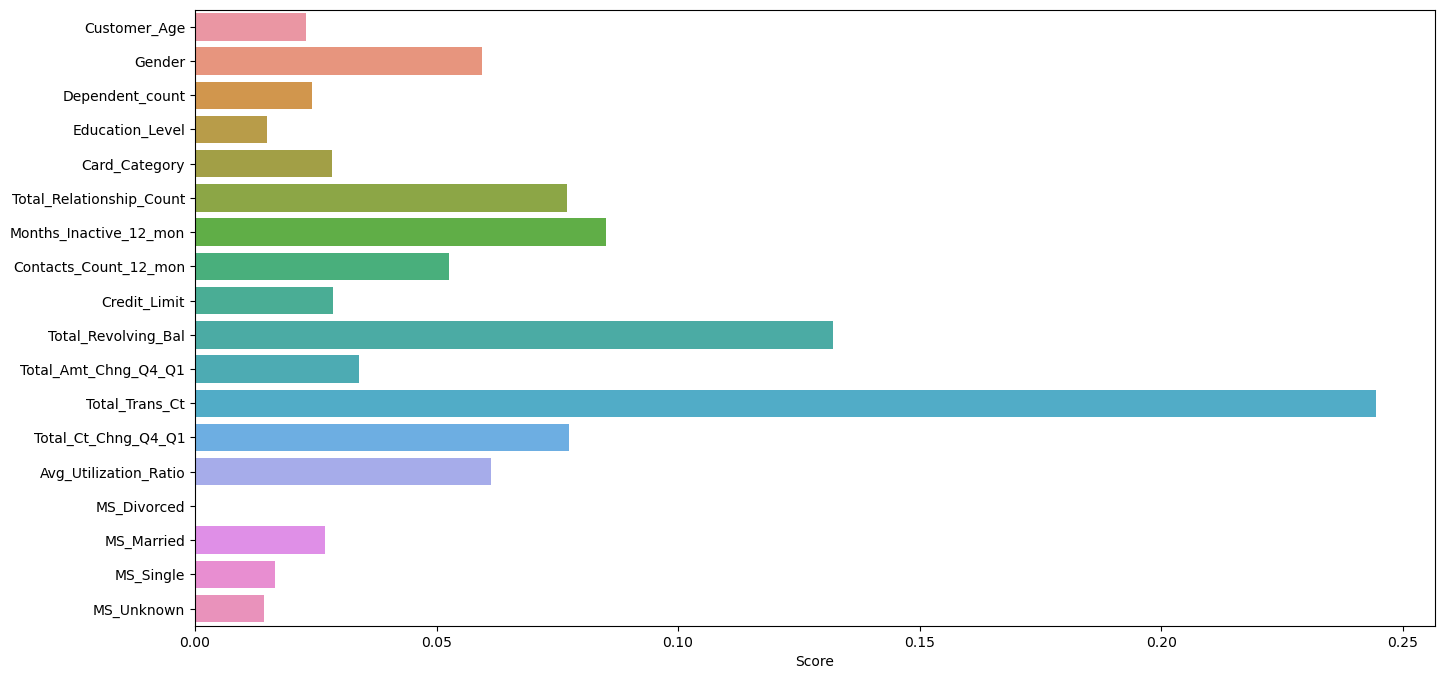

In [111]:
plt.figure(figsize=(16,8))
#plt.title('Feature Importances')
sns.barplot(x=df_feat_importance.Score,y=df_feat_importance.index)